# **I. Introduction**

<p>=================================================<br>

**Milestone 1**

**Nama**  : Maulana Yusuf Taufiqurrahmahman<br>
**Batch** : HCK-26<br>

The purpose of this Milestone is about analyzing the factors of sports car prices to create a better decisions while buying the sports car.<p>
=================================================</p>

**Link Dashboard Tableau:**<br>
https://public.tableau.com/app/profile/maulana.yusuf4588/viz/M1_maulana_yusuf/Dashboard1?publish=yes

Hi there! My name is Maulana, a ``Data Analyst`` in the sports car sector of automotive business. I have extensive knowledge of market trends, vehicle performance, and other variables that affect pricing and customer preferences. I also have experience and competence in data analysis, visualization, and data-driven decision making.<p>

As a Data Analyst, I am responsible for:
- Examining sports car pricing performance trends according to brand, performance, and acceleration.
- Target market identification based on historical data, customer preferences, and purcahse trends
- Presenting insights to stakeholders through interactive data visualizations such as Tableau and Python.<p>

In this ocassion, I will provide an information about the price of sports car based on the manufacturer, model, year, and other deatures that related to in a dataset.<p>

Undoubtedly, the corporation has granted authorization for this dataset to be analyzed and shared with users who require it as a precise example.

# **II. Identification of Problems**

### **Background**
Sport cars are a highly sought-after vehicle segment due to their elegant design, high performance, and exclusive status. The prices of used sports cars vary depending on various factors such as make, model, year of manufacture, and other features of the vehicle. This dataset provides information on sports car prices from various well-known brands, helping the analysis of used sports car market prices. By understanding price patterns and factors that affect their value, users can make better decisions while buying or selling sports cars.

### **SMART method**
**S**pecific: Analyzing the factors that influence the selling price of used sports cars

**M**easurable: With a prediction accuracy improvement at least 10% based on statistical analysis and visual data exploration, achievement will be defined as discovering at least four important variables that significantly influence price fluctuation.

**A**chievable: Conducting exploratory and predictive analysis using data science techniques. With sufficient data, a car prediction model can be created accurately.

**R**elevant: This analysis provides valuable insights for used sports car buyers to see if the price is reasonable.

**T**ime-Bound: This analysis is carried out within a certain period, which is six months to reflect the current market trends.

### **Statement**
Understanding the factors that influence the price of used sports cars using datasets from various well-known brands by exploring the relationship between variables such as car maker, car model, year of manufacture, and other features with an improvement prediction at least 10% based on statistical analysis and visualization exploration. It provides insights from buyers to see the reasonable price, including performing statistical and predictive analysis to help the automotive market more accurately in six months.

### **Audience**
The audience from this dataset will be noticed by:<p>
**Used sports car buyers:** help to get the best deals by assessing whether the price offered is reasonable based on the car's features.


### **5W + 1H method**
1. What?: Identifying the main factors influencing price fluctuations using statistical analysis and exploration data. ``(Histogram)``

2. Who?: Used sports car buyers, to see the reasonable prices. ``(Bar Chart)``

3. Where?: The exploration can be applied in online car markets, dealerships, and auction platforms to enhance pricing strategies. ``(Regression plot)``

4. When?: Ideally updated quarterly to capture market trends and inflation effect on car prices. ``(Box Plot)``

5. Why?: Examined by using statistical measures such as correlation analysis to quantify their impact on pricing. ``(Inferential Statistics)``

6. How?: Using ``Descriptive Statistics`` to calculate the measurement of central tendency, such as mean price variations accross different car models and year groups.


# **III. Data Loading**

### **Importing the Packages**

In [1]:
# Create a dataframe
import pandas as pd
import numpy as np

# Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics Tools
from scipy import stats

This section above explain about the packages that will be used in this Milestone, include: 
- **Pandas** & **Numpy** = for creating a dataframe such as for measurement of central tendency
- **Matplotlib** & **Seaborn** = to create a visualization analysis
- **Scipy** = to using statistical analysis

### **Read the CSV file**

In [2]:
# Load the dataset
df = pd.read_csv('Sport_car_price.csv', delimiter=';')

Generally, reading a CSV file only requires typing the 'file_name.csv' section. However, for this file there is a semicolon, where it have to use the delimiter semicolon.

In [3]:
# Show the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


Note: Before cleaning the data, the Non-Null Count of Engine Size (L) is 997 and Torque is 1004

This section explain about the summary of the dataset of 'Sport car price'. There are some columns that need to convert in Dtype section,<br>
which is Engine Size, Horsepower, Torque, Price, and 0-60 MPH Time (seconds) in the **Data Cleaning** section

In [4]:
# Show 5 rows from top from dataset
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,2"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,39"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,75"
3,Audi,R8,2022,5.2,562,406,3.2,"142,7"
4,McLaren,720S,2021,4,710,568,2.7,298


This section shows about to read the raw file and displaying 5 rows data from top using .head()

# **IV. Data Cleaning**

### **Check the missing values**

In [5]:
# Checking the missing values (Before)
df.isnull().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

From this section, there are two columns with the missing values in the Engine Size (L) and Torque. Therefore, we need to handle it by using **.fillna(0)**

In [6]:
# Check the non-missing values columns

# Car make
car_make_check = df['Car Make'].unique()
# Car Model
car_model_check = df['Car Model'].unique()
# Year
year_check = df['Year'].unique()
# Horsepower
horsepower_check = df['Horsepower'].unique()
# 0-60 MPH (in seconds)
speed_check = df['0-60 MPH Time (seconds)'].unique()
# Price in USD
price_check = df['Price (in USD)'].unique()

# Show the output
print(f'Unique Category: {car_make_check}')
print(f'Unique Category: {car_model_check}')
print(f'Unique Category: {year_check}')
print(f'Unique Category: {horsepower_check}')
print(f'Unique Category: {speed_check}')
print(f'Unique Category: {price_check}')

Unique Category: ['Porsche' 'Lamborghini' 'Ferrari' 'Audi' 'McLaren' 'BMW' 'Mercedes-Benz'
 'Chevrolet' 'Ford' 'Nissan' 'Aston Martin' 'Bugatti' 'Dodge' 'Jaguar'
 'Koenigsegg' 'Lexus' 'Lotus' 'Maserati' 'Alfa Romeo' 'Ariel' 'Bentley'
 'Mercedes-AMG' 'Pagani' 'Polestar' 'Rimac' 'Acura' 'Mazda' 'Rolls-Royce'
 'Tesla' 'Toyota' 'W Motors' 'Shelby' 'TVR' 'Subaru' 'Pininfarina' 'Kia'
 'Alpine' 'Ultima']
Unique Category: ['911' 'Huracan' '488 GTB' 'R8' '720S' 'M8' 'AMG GT' 'Corvette'
 'Mustang Shelby GT500' 'GT-R Nismo' 'DB11' 'Chiron'
 'Challenger SRT Hellcat' 'F-Type' 'Jesko' 'LC 500' 'Evora GT'
 'GranTurismo' 'Boxster' 'Giulia Quadrifoglio' 'Atom' 'Continental GT'
 'Artura' 'SLS AMG' 'Huayra' '1' 'Nevera' 'Cayman GT4' 'Aventador SVJ'
 'SF90 Stradale' 'RS7' 'M4' 'Camaro ZL1' 'GT' '370Z Nismo' 'Taycan 4S'
 'Urus' 'Roma' 'RS3' 'i8' 'CLS63 AMG' 'Cayman' '570S' 'AMG C63'
 'Camaro SS' 'Mustang GT' 'Vantage' 'Panamera' 'S5' '600LT' 'M5' 'RS5'
 'M2' 'Challenger SRT Hellcat Redeye' 'Aventador' 'C63

According to the result, we can see that there are the values of each columns, including NaN, '-', 0, and more. Those data are **not** clean. We need to clean them by several steps.

In [7]:
# Filling 'N/A' into 0
df = df.replace('N/A', np.nan).fillna(0)

This method is used to change or filled the "N/A" word into 0, to make the values are filled. To make sure, check the information using **.isnull().sum()**, not .info().

In [8]:
# Check the latest info about missing values (After)
df.isnull().sum()

Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

This section shows about after filling the missing values into 0. As we can see, the values are filled.

In [9]:
# Show the columns
df.columns

Index(['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower',
       'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)'],
      dtype='object')

This section displays about the columns in Sport car price dataset and there are no white spaces. To make it sure, use .info()

In [10]:
# Check the latest info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          1007 non-null   object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1007 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


This section explain about the latest info of Sport car price dataset. As we can see, the values are filled.<br>
Next step is doing the coverting Dtype.

In [ ]:
# Check the percentage of duplicates
print((df.duplicated().sum() / len(df)) * 100)

28.599801390268127


This section shows us about how many percentage of duplicates data. In this case, there are around 29% of duplicates. We need to drop them into the next step.

In [ ]:
# Converting Dtype sections

# Take the first number that appears in the text
df['Engine Size (L)'] = df['Engine Size (L)'].astype(str).str.extract(r'(\d+\.\d+|\d+)')
# Filling the NaN with 0
df['Engine Size (L)'].fillna(0, inplace=True)

# Remove comas and plus sign
df['Horsepower'] = df['Horsepower'].astype(str).str.replace(',', '').str.replace('+', '')
# Filling the Nan with 0
df['Horsepower'].fillna(0, inplace=True)

# Remove comas and plus sign
df['Torque (lb-ft)'] = df['Torque (lb-ft)'].astype(str).str.replace('-', '0').str.replace(',', '').str.replace('+', '')
# Filling the NaN with 0
df['Torque (lb-ft)'].fillna(0, inplace=True)

# Remove '<' sign
df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].astype(str).str.replace('<', '')
# Filling the Nan with 0
df['0-60 MPH Time (seconds)'].fillna(0, inplace=True)

# Handling thousands and decimal points
df['Price (in USD)'] = df['Price (in USD)'].astype(str).str.replace(',','')
# Filling the NaN with 0
df['Price (in USD)'].fillna('0', inplace=True)

# Converting to numeric types
df['Engine Size (L)'] = df['Engine Size (L)'].astype(float)
df['Horsepower'] = df['Horsepower'].astype(int)
df['Torque (lb-ft)'] = df['Torque (lb-ft)'].astype(int)
df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].astype(float)
df['Price (in USD)'] = df['Price (in USD)'].astype(int)

# Show the output
print(df)

         Car Make Car Model  Year  Engine Size (L)  Horsepower  \
0         Porsche       911  2022              3.0         379   
1     Lamborghini   Huracan  2021              5.2         630   
2         Ferrari   488 GTB  2022              3.9         661   
3            Audi        R8  2022              5.2         562   
4         McLaren      720S  2021              4.0         710   
...           ...       ...   ...              ...         ...   
1002   Koenigsegg     Jesko  2022              5.0        1280   
1003        Lotus     Evija  2021              0.0        1972   
1004      McLaren     Senna  2021              4.0         789   
1005       Pagani    Huayra  2021              6.0         764   
1006        Rimac    Nevera  2021              0.0        1888   

      Torque (lb-ft)  0-60 MPH Time (seconds)  Price (in USD)  
0                331                     4.00            1012  
1                443                     2.80           27439  
2              

C:\Users\omen\AppData\Local\Temp\ipykernel_34812\2551156911.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine Size (L)'].fillna(0, inplace=True)
C:\Users\omen\AppData\Local\Temp\ipykernel_34812\2551156911.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Converting and replacing is the most challenging part in this section because we need to replace many signs such as, ',', '+', '-', and many more. Not only that, we need to do also converting the datatype into int and float for some columns.<p>
After that, we need to check the information to see if it is converted.

In [13]:
# Make sure already converted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 1007 non-null   object 
 1   Car Model                1007 non-null   object 
 2   Year                     1007 non-null   int64  
 3   Engine Size (L)          1007 non-null   float64
 4   Horsepower               1007 non-null   int32  
 5   Torque (lb-ft)           1007 non-null   int32  
 6   0-60 MPH Time (seconds)  1007 non-null   float64
 7   Price (in USD)           1007 non-null   int32  
dtypes: float64(2), int32(3), int64(1), object(2)
memory usage: 51.3+ KB


As we can see from above, the dtype is already converted such as 'Engine Size (L)' and '0-60 MPH Time (seconds)' column into float.<br>
But remember, there is still duplicates data that we need to drop.

In [14]:
# Check the duplicate
duplicate_num = df.duplicated().sum()

# Show the duplicate value
print(f'Amount of duplicate: {duplicate_num}')

Amount of duplicate: 293


Checking the duplicates data is important, because duplicates cannot be analyzed. We need to drop it.

In [15]:
# Drop the duplicates
df = df.drop_duplicates()

In [16]:
# Create drop duplicate variable
drop_duplicate = df.duplicated().sum()

# Show the duplicate value
print(f'Amount of duplicate: {drop_duplicate}')

Amount of duplicate: 0


After dropping duplicates value by using .drop_duplicates(), there are no more duplicates.

In [17]:
# The latest entries of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 714 non-null    object 
 1   Car Model                714 non-null    object 
 2   Year                     714 non-null    int64  
 3   Engine Size (L)          714 non-null    float64
 4   Horsepower               714 non-null    int32  
 5   Torque (lb-ft)           714 non-null    int32  
 6   0-60 MPH Time (seconds)  714 non-null    float64
 7   Price (in USD)           714 non-null    int32  
dtypes: float64(2), int32(3), int64(1), object(2)
memory usage: 41.8+ KB


Always check the latest information while cleaning the data. From this data, we got **714 data entries**, which was previously 1007 data entries.

In [54]:
# Download the cleaned file
df.to_csv('Sport_car_price_cleaned.csv', index=False)

After cleaning the dataset, we need to export the cleaned file into a csv to make a visualization in Tableau. It is important to do this because if we analyzing using the raw data, the result will be different with the visualization.

# **V. Data Analysis and Data Visualization**

In [18]:
df

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3.0,379,331,4.00,1012
1,Lamborghini,Huracan,2021,5.2,630,443,2.80,27439
2,Ferrari,488 GTB,2022,3.9,661,561,3.00,33375
3,Audi,R8,2022,5.2,562,406,3.20,1427
4,McLaren,720S,2021,4.0,710,568,2.70,298
...,...,...,...,...,...,...,...,...
999,Nissan,370Z,2021,3.7,332,270,5.10,3009
1002,Koenigsegg,Jesko,2022,5.0,1280,1106,2.50,3000000
1003,Lotus,Evija,2021,0.0,1972,1254,2.00,2000000
1005,Pagani,Huayra,2021,6.0,764,738,3.00,2600000


This section explains about the Data Analysis and Data Visualization.<p>
For **Data Analysis**, it consists of Statics Descriptive and Inferential.<p>
For **Data Visualization**, it consists of Bar Chart, Histogram, and many more.

#### **1. Data Analysis**

Data Analysis consists of: Statistics - Descriptive and Statics - Inferential<br>
After that, we need to define two distrubutions: Discrete & Continuous.<p>
**Continuous:**
- Engine Size (L)
- 0-60 MPH (seconds)
- Price (in USD)

**Discrete:**
- Year
- Horsepower
- Torque (lb-ft)<br>

#### **Statistics Descriptive**

Descriptive Statics used to help to understanding the main characteristic of dataset, such as distribution car prices.<p>
Furthermore, this method gives us numerical summaries, for example Mean, Median, Mode (Modus) and more.<br>
Additionally, it visualizes us data with graphs, such as histogram, Bar Chart, Scatter Plot, and more.

In [47]:
# Measurement of Central Tendency

# Price
pr_mean = df['Price (in USD)'].mean()
pr_med = df['Price (in USD)'].median()
pr_mod = df['Price (in USD)'].mode().values[0]

# Engine Size (L)
es_mean = df['Engine Size (L)'].mean()
es_med = df['Engine Size (L)'].median()
es_mod = df['Engine Size (L)'].mode().values[0]

# Horsepower
hp_mean = df['Horsepower'].mean()
hp_med = df['Horsepower'].median()
hp_mod = df['Horsepower'].mode().values[0]

# Torque (lb-ft)
torq_mean = df['Torque (lb-ft)'].mean()
torq_med = df['Torque (lb-ft)'].median()
torq_mod = df['Torque (lb-ft)'].mode().values[0]

# Create a table
values = {
    'Column': ['Price (in USD)', 'Engine Size (L)', 'Horsepower', 'Torque (lb-ft)'],
    'Mean': [pr_mean, es_mean, hp_mean, torq_mean],
    'Median': [pr_med, es_med, hp_med, torq_med],
    'Mode': [pr_mod, es_mod, hp_mod, torq_mod]
}

# Create a dataframe
data_values = pd.DataFrame(values)

# Show the output
data_values

,Column,Mean,Median,Mode
0,Price (in USD),270510.460784,1032.0,3000000.0
1,Engine Size (L),4.405322,4.0,4.0
2,Horsepower,633.408964,587.0,503.0
3,Torque (lb-ft),563.529412,505.0,443.0


In Measurement of Central Tendency, there are many methods for calcuate it. But, in general, we just need to calculate the 3M: **Mean, Median, and Mode**.<br>
From the result, as we can see that:
- The mean of price is much more higher than median. This indicates there is presence of outliers (very high prices) that pull the average upwards.
- Engine Size (L), Horsepower, and Torque show ``normal tendencies``, but there are some outliers

#### **2. Data Visualization**

Visualization:

1. Bar Chart: Displays the average price per car brand to analyze brand influence on pricing.

2. Box Plot: Illustrates price distribution across different car model years, highlighting variations over time.

3. Scatter Plot: Examines the relationship between engine specifications (e.g., horsepower, displacement) and price to analyze performance impact.

4. Pair Plot or Heatmap: Examines correlations between numerical variables such as price, engine size, and manufacturing year to identify strong relationships.

Statistical Analysis:

1. Descriptive Statistics: Mean, median, and standard deviation of prices, engine specifications, and other key features.

2. Inferential Statistics: Hypothesis testing to determine significant factors influencing price variations

#### **Create the visualization**

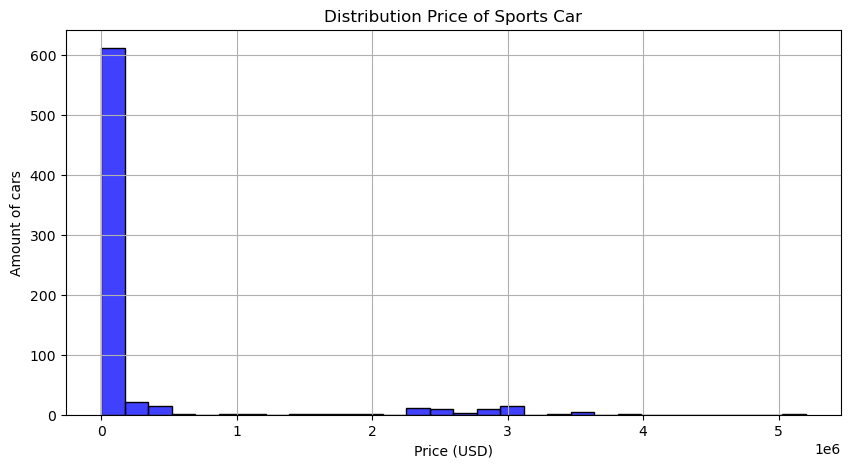

In [35]:
# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['Price (in USD)'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution Price of Sports Car')
plt.xlabel('Price (USD)')
plt.ylabel('Amount of cars')
plt.grid(True)
plt.show()

Insights:
- According to the histogram's positive skewness (right-skewed), the majority of sports car are reasonably priced, while a small number are extremely expensive. On the other hand, some sports car have extremely high pricing. This is a regular occurence in automobile price data.<p>
- Additionally, the majority of prices are low, which have quite tall bars on the left side and reasonably priced. The distribution that is extended to the right shows that some cars are more expensive.

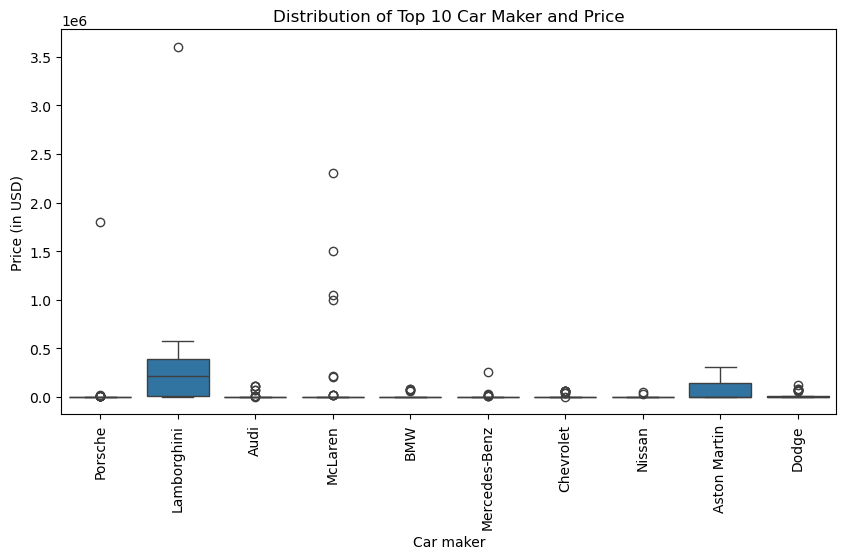

In [21]:
# Top 10 Car maker and Price
top_10_makers = df['Car Make'].value_counts().index[:10]
df_filtered = df[df['Car Make'].isin(top_10_makers)]

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_filtered['Car Make'], y=df_filtered['Price (in USD)'])
plt.xticks(rotation=90)
plt.title('Distribution of Top 10 Car Maker and Price')
plt.xlabel('Car maker')
plt.ylabel('Price (in USD)')
plt.show()

Insights:
- According from the top 10 of car maker (box plot), Lamborghini and Aston Martin have higher average prices than other brands on the list.<br>
- Then, there are several brands that have an outlier, especially for Porsche, McLaren, and Lamborghini demonstrates that some models within the same brand are significantly more expensive than others.

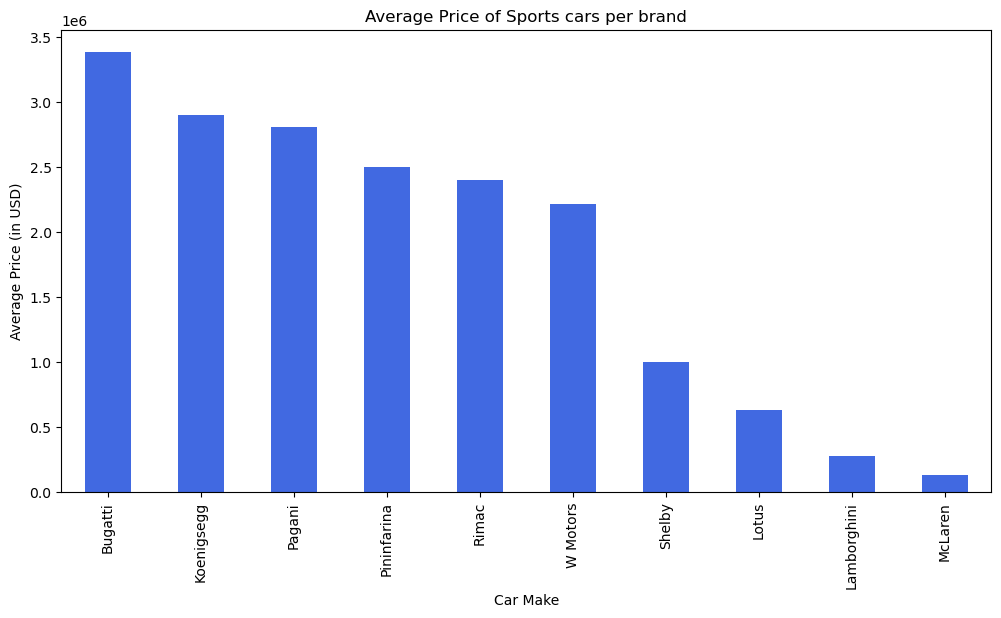

In [22]:
# Average price (per brand)
plt.figure(figsize=(12, 6))
brand_avg_price = df.groupby('Car Make')['Price (in USD)'].mean().sort_values(ascending=False).head(10)
brand_avg_price.plot(kind='bar', color='royalblue')
plt.title('Average Price of Sports cars per brand')
plt.xlabel('Car Make')
plt.ylabel('Average Price (in USD)')
plt.xticks(rotation=90)
plt.show()

Insights:
- The most expensive car on average price is Bugatti, which typically cost more than $3.5 million. Its reputation as a producer of high-end hypercars like the Bugatti Chiron and Bugatti Divo is consistent with this.<p>
- In the middle segments are Koenigsegg, Pagani, and Pininfarina have an average price of more than $2.5 million. They are quite costly due to their limited production and sophisticated technology.<p>
- While the other brands with below than $2.5 million are still adored by many, mostly collectors.

From the insight, we can see that the Chiron Super Sport 300+ dominates of the top price list. Following the competitors, Sian until Huayra BC also compete with each others, where the difference are not too far.

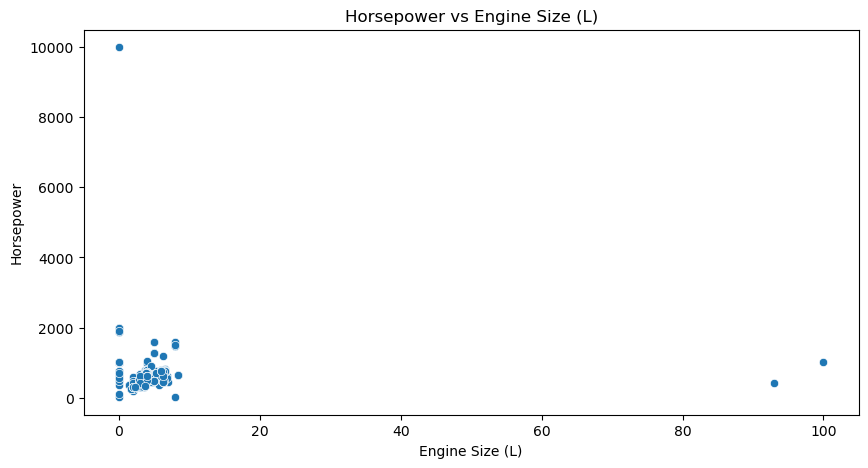

In [23]:
# Horsepower and Engine Size (L)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Engine Size (L)'], y=df['Horsepower'])
plt.title('Horsepower vs Engine Size (L)')
plt.xlabel('Engine Size (L)')
plt.ylabel('Horsepower')
plt.show()

Insights:
- It seems that there is a non-linear or extremely variable relationship between engine size and horsepower.
- There are many outliers to the general rule that larger engines provide more horsepower.

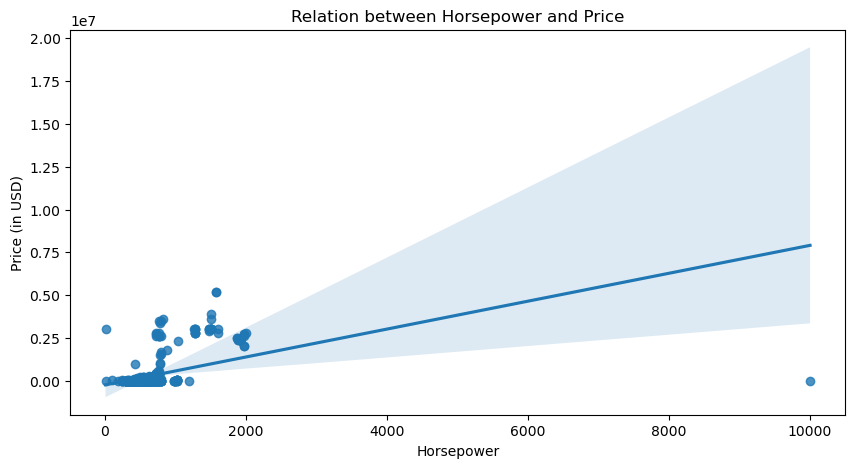

In [ ]:
# Horsepower and Price
plt.figure(figsize=(10, 5))
sns.regplot(x=df["Horsepower"], y=df["Price (in USD)"])
plt.title("Relation between Horsepower and Price")
plt.xlabel("Horsepower")
plt.ylabel("Price (in USD)")
plt.show()

Inisights:
- Regression model in Price and Horsepower chart have a ``positive correlation``. It is evident from the upward regression line that cars with more horsepower typically cost more.
- This model is to be expected because it is given that sports car typically have superior performance and more advanced in some features.

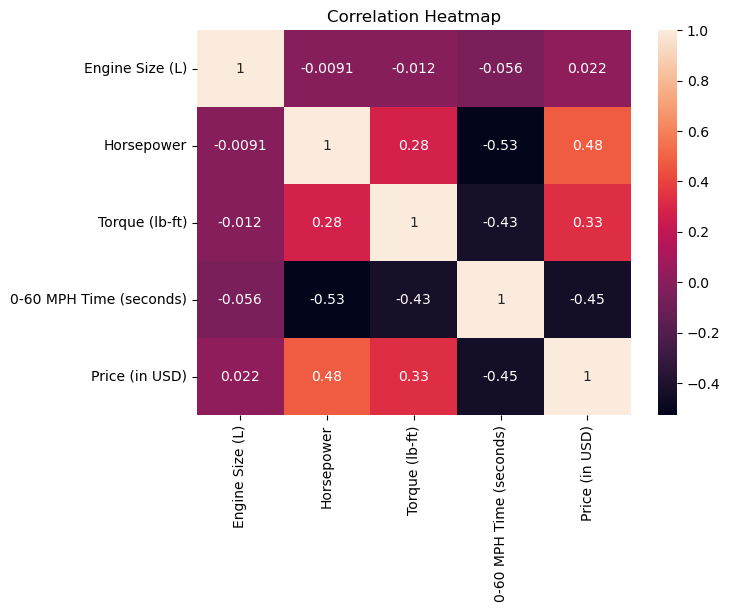

In [37]:
# Heatmap of numerical features
num_features = ['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)']

plt.figure(figsize=(7, 5))
sns.heatmap(df[num_features].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

Insights:
- Horsepower and Price are positively correlated (0.48). Higher horsepower cars are typically more expensive. Nevertheless, the correlation is weak (0.48), indicating that pricing is influenced by additional factors.
- Torque and Price are also correlated (0.33), which somehow is moderately positive. This make sense because vehicles with higher torque typically have better performance, which can result in higher prices.

### **Hypothesis:**<p>
#### **1. Does a sports car brand have a relationship with prices?**

The hypothesis from the question is below:<p>
- H0: There is **no significant** difference between a sports car brand with the price of used sports cars.
- H1: A sports car brand **have a significant** difference on the price of used sports cars.

To test it, using **Two Sample Independent Test** method is the best option because the data comes from Two Independent Groups.

In [43]:
# Filtering data based on car brands
bugatti_prices = df['Price (in USD)'][df['Car Make'] == 'Bugatti']
shelby_prices = df['Price (in USD)'][df['Car Make'] == 'Shelby']

# Do the Two Sample Independent t-Test
t_stat, p_value = stats.ttest_ind(bugatti_prices, shelby_prices)

# Show the output
print(f"T-Statistic: {t_stat}")
print(f"P-value: {p_value}")

T-Statistic: 2.944604328066449
P-value: 0.010659113249706602


As we can see from the result, **if p-value < 0.05**, H0 is **successed** rejected. It means that there is **significant** difference between a sports car brand with the price of used sports cars.

# **VI. Conclusion**

``In general:``<p>
For a researcher to reach this milestone, a dataset with at least three categorical and three numerical columns with the minimum 1000 - 2000 rows of data have to be explored. Following that, a description of the dataset's background and the methodology utilized is required.<p>
The dataset that already explored and downloaded from Kaggle or other sources needs to be loaded, which involves reading the dataset to determine its cleanliness. In this case, it contains empty values (0) and NaN, the dataset in this instance is not clean. The challenging part is have to be double-checked.<p>
Following data cleaning, the dataset must be analyzed using the proper statistical and visual aids. The dataset requires adequate relations, which makes analysis difficult.<p>

``Sports car price analysis:``
- In the measurement of central tendency, the distribution of price is highly skewed (tends to the right), with the median being significantly smaller than the mean, suggesting that premium cars have many outliers.
- The **median** of Engine Size, Horsepower, and Torque is near to **mean**, which conclude that they have more stable distribution.
- Regression between Horsepower and Price is **evident** because the higher performance of a car, the higher prices to get.
- Based on **Two Sample Independent Test**, there is **significant** relationship between a car brand with the prices.<p>

``Recommendations:``
- For the next researcher, it is recommended to do more investigation using sophisticated **Machine Learning** model to make a precise forecasts.


Notes:
Heatmap is not been visualized in Tableau because the Two Sample Independent Test method is representative.